In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
results_filename = "results-eval/11-results.csv"

In [3]:
results_df = pd.read_csv(results_filename, index_col=0)

In [4]:
results_df

,Sentence,Pre-processed sentence,textblob-subjectivity,vader-pos,vader-neg,vader-neu,vader-compound,vader-polarity,sentiment-category,manual eval
0,Some help buttons?,help button,0.0,0.730,0.0,0.270,0.4019,Positive,NaN,Neutral
1,But to the declaration and.,declaration,0.0,0.000,0.0,1.000,0.0000,Neutral,NaN,Neutral
2,Information.,information,0.0,0.000,0.0,1.000,0.0000,Neutral,NaN,Neutral
3,And we can see a lot of links that just connec...,see lot link connect registration,0.0,0.429,0.0,0.571,0.4588,Positive,NaN,Neutral
4,For the chests looks animations.,chest look animation,0.0,0.000,0.0,1.000,0.0000,Neutral,NaN,Neutral
...,...,...,...,...,...,...,...,...,...,...
96,You need to send me them.,need send,0.0,0.000,0.0,1.000,0.0000,Neutral,NaN,Neutral
97,Hmm to the doctor and the vaccination center.,hmm doctor vaccination center,0.1,0.000,0.0,1.000,0.0000,Neutral,NaN,Neutral
98,For this website.,website,0.0,0.000,0.0,1.000,0.0000,Neutral,NaN,Neutral
99,Between 4:00 and five 4.5.,400 five 45,0.0,0.000,0.0,1.000,0.0000,Neutral,NaN,Neutral


In [5]:
cm = pd.crosstab(results_df['manual eval'], results_df['vader-polarity'], rownames=['manual eval actual'], colnames=['vader-polarity predicted'])

In [6]:
cm

vader-polarity predicted,Negative,Neutral,Positive
manual eval actual,,,
Negative,6,4,0
Neutral,3,58,16
Positive,0,1,13


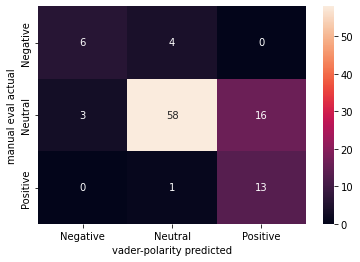

In [7]:
sn.heatmap(cm, annot=True)
plt.show()

In [8]:
actual = results_df['manual eval'].tolist()
predicted = results_df['vader-polarity'].tolist()

In [9]:
metrics = classification_report(actual,predicted)
print('Classification report : \n',metrics)

Classification report : 
               precision    recall  f1-score   support

    Negative       0.67      0.60      0.63        10
     Neutral       0.92      0.75      0.83        77
    Positive       0.45      0.93      0.60        14

    accuracy                           0.76       101
   macro avg       0.68      0.76      0.69       101
weighted avg       0.83      0.76      0.78       101

